<a href="https://colab.research.google.com/github/alaks1377/Employee-Compensation/blob/main/Employee_Compensation_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Employee_Salary_Compensation.csv')

In [ ]:
data.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013.0,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730.0,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013.0,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574.0,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013.0,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148.0,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013.0,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436.0,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013.0,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730.0,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [ ]:
data.shape

(384564, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384564 entries, 0 to 384563
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  384564 non-null  int64  
 1   Job Family Code          384564 non-null  object 
 2   Job Code                 384564 non-null  object 
 3   Year Type                384564 non-null  object 
 4   Year                     384563 non-null  float64
 5   Organization Group       384563 non-null  object 
 6   Department Code          384563 non-null  object 
 7   Department               384563 non-null  object 
 8   Union Code               384427 non-null  float64
 9   Union                    384427 non-null  object 
 10  Job Family               384563 non-null  object 
 11  Job                      384562 non-null  object 
 12  Employee Identifier      384563 non-null  float64
 13  Salaries                 384563 non-null  float64
 14  Over

In [ ]:
data.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         1
Organization Group           1
Department Code              1
Department                   1
Union Code                 137
Union                      137
Job Family                   1
Job                          2
Employee Identifier          1
Salaries                     1
Overtime                     1
Other Salaries               1
Total Salary                 1
Retirement                   1
Health and Dental            1
Other Benefits               1
Total Benefits               1
Total Compensation           1
dtype: int64

In [ ]:
data.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,384564.000000,384563.000000,384427.000000,3.845630e+05,384563.000000,384563.000000,384563.000000,384563.000000,384563.000000,384563.000000,384563.000000,384563.000000,384563.000000
mean,2.947208,2016.127797,495.739436,1.762440e+07,70811.586607,5570.071340,3986.243299,80170.254352,14124.776732,10134.497427,5064.713602,29323.987762,109494.242114
std,1.588922,2.397199,331.089207,1.980863e+07,47883.649850,13312.862653,8741.301692,56088.040117,10389.961406,5767.935140,3734.461593,18064.162082,72749.920931
min,1.000000,2013.000000,1.000000,0.000000e+00,-68771.780000,-1072.880000,-7058.590000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,2.000000,2014.000000,250.000000,2.557050e+04,31461.020000,0.000000,0.000000,34570.570000,5296.840000,5101.675000,1940.685000,12994.185000,48283.155000
50%,2.000000,2016.000000,535.000000,5.117100e+04,68911.100000,0.000000,773.770000,76165.600000,14255.420000,12726.400000,4916.410000,33017.470000,109449.830000
75%,4.000000,2018.000000,790.000000,3.790620e+07,102011.885000,4383.665000,4639.930000,114499.025000,20635.070000,14188.410000,7558.880000,41417.320000,156881.760000
max,7.000000,2020.000000,990.000000,4.609664e+07,596615.860000,315896.410000,568163.120000,596615.860000,128694.620000,59405.230000,35691.040000,166068.180000,762684.040000


In [ ]:
col_name=data.columns
for i in col_name:
    print(i,'has :',data[i].nunique(),"Unique values")

Organization Group Code has : 7 Unique values
Job Family Code has : 59 Unique values
Job Code has : 1211 Unique values
Year Type has : 3 Unique values
Year has : 8 Unique values
Organization Group has : 7 Unique values
Department Code has : 60 Unique values
Department has : 107 Unique values
Union Code has : 70 Unique values
Union has : 128 Unique values
Job Family has : 59 Unique values
Job has : 1346 Unique values
Employee Identifier has : 219966 Unique values
Salaries has : 286438 Unique values
Overtime has : 161549 Unique values
Other Salaries has : 193753 Unique values
Total Salary has : 355517 Unique values
Retirement has : 268328 Unique values
Health and Dental has : 120862 Unique values
Other Benefits has : 316300 Unique values
Total Benefits has : 360803 Unique values
Total Compensation has : 376110 Unique values


In [ ]:
data['Job Family Code'].unique()

array(['1000', '1200', '1600', '1800', '1400', '0900', '8400', '9700',
       '9900', 'SCRT', '8100', '1500', '5200', '8200', '8600', '2500',
       '1900', '6200', '2200', '2100', '2300', 'H000', 'Q000', '7100',
       '7200', '7300', '2600', '2700', '7500', '8300', '2900', '1300',
       '7400', '1700', '3300', '9200', '3400', '2400', '5100', '5300',
       '5500', '5600', '6100', '6300', '9300', '3500', '3600', '4300',
       '5400', '9100', '4100', '2800', '4200', '1100', '3200', 'SFRA',
       '0000', '__UNASSIGNED__', '9500'], dtype=object)

In [ ]:
data['Job Code'].unique()

array(['1021', '1023', '1031', ..., '3502', '3246', '1367'], dtype=object)

In [ ]:
data['Department Code'].unique()

array(['ADP', 'CRT', 'DAT', 'ECD', 'FIR', 'JUV', 'PDR', 'POL', 'SHF',
       'AIR', 'CWP', 'DBI', 'DPW', 'ECN', 'HHP', 'MTA', 'PAB', 'PRT',
       'PUC', 'WTR', 'CFC', 'CHF', 'CII', 'CSS', 'DSS', 'ENV', 'HRC',
       'RNT', 'WOM', 'DPH', 'AAM', 'ART', 'FAM', 'LIB', 'LLB', 'REC',
       'SCI', 'WAR', 'ADM', 'ASR', 'BOS', 'CAT', 'CON', 'CPC', 'CSC',
       'ETH', 'HRD', 'HSS', 'MYR', 'REG', 'RET', 'TIS', 'TTX', 'UNA',
       'CLP', 'HOM', 'DEM', 'DPA', 'BOA', 'HSA', nan], dtype=object)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans=KMeans(n_clusters=3)

In [ ]:
data.columns

Index(['Organization Group Code', 'Job Family Code', 'Job Code', 'Year Type',
       'Year', 'Organization Group', 'Department Code', 'Department',
       'Union Code', 'Union', 'Job Family', 'Job', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

In [ ]:
df=data.drop(['Job Family Code','Job Code','Year Type','Organization Group','Department Code','Department','Union','Job Family','Job'],axis=1)

In [ ]:
df.shape

(384427, 13)

In [ ]:
df = df.dropna()

In [ ]:
kmeans.fit(df)

KMeans(n_clusters=3)

In [ ]:
print(kmeans.cluster_centers_)

[[2.96262607e+00 2.01755942e+03 4.94647773e+02 3.74064265e+07
  7.32532655e+04 6.21906041e+03 3.79233645e+03 8.28021743e+04
  1.38221089e+04 1.06530783e+04 5.21684652e+03 2.96920337e+04
  1.12494208e+05]
 [2.92435915e+00 2.01424386e+03 4.96746238e+02 2.85324561e+04
  6.46806091e+04 4.65812247e+03 3.94527211e+03 7.32839481e+04
  1.28657491e+04 9.14904846e+03 4.66918046e+03 2.66839780e+04
  9.99679260e+04]
 [2.98774673e+00 2.01949280e+03 4.94289711e+02 4.22400719e+07
  8.42229322e+04 7.25336221e+03 4.30466740e+03 9.53524565e+04
  1.77368629e+04 1.21519518e+04 5.93595259e+03 3.58247673e+04
  1.31177224e+05]]


In [ ]:
y=kmeans.labels_
print(y)

[1 1 1 ... 1 1 1]


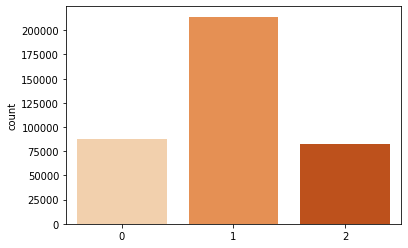

In [ ]:
sns.countplot(x=kmeans.labels_, palette='Oranges')
plt.show()

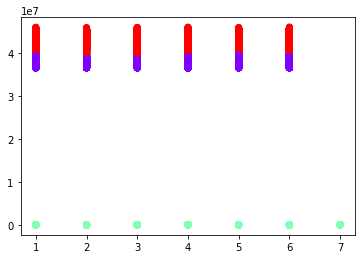

In [ ]:
plt.scatter(df.iloc[:,0].values,df.iloc[:,3].values, c=kmeans.labels_, cmap="rainbow")
plt.show()

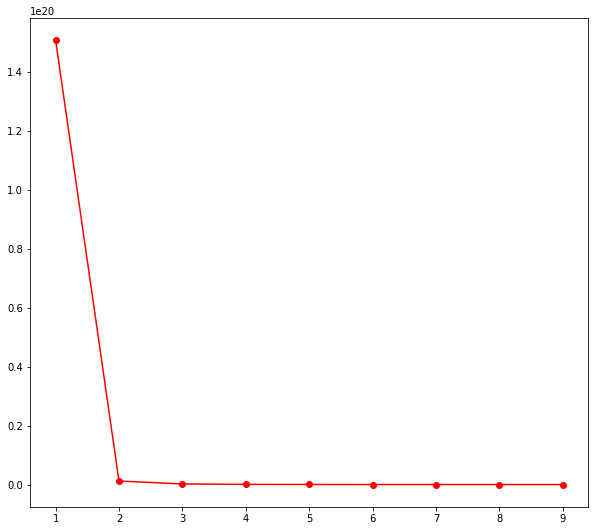

In [ ]:
wcss =[]
plt.figure(figsize=(10,9))
for i in range(1,10):
  km = KMeans(n_clusters=i, init='k-means++')
  km.fit(df)
  wcss.append(km.inertia_)

plt.plot(range(1,10),wcss,'r*-',marker='o')